In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Raw_Data_Singapore Credit Dataset.csv')

In [ ]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [ ]:
# Function to convert 'yes' and 'no' to 1 and 0
def convert_yes_no_to_binary(column_value):
    if column_value == 'yes':
        return 1
    elif column_value == 'no':
        return 0
    else:
        return column_value

# Apply the conversion function to a specific column in the DataFrame
df['default'] = df['default'].apply(lambda x: convert_yes_no_to_binary(x))
df['default'] = df['default'].apply(lambda x: convert_yes_no_to_binary(x))

In [ ]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,0
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,1
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,0
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,0
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,1


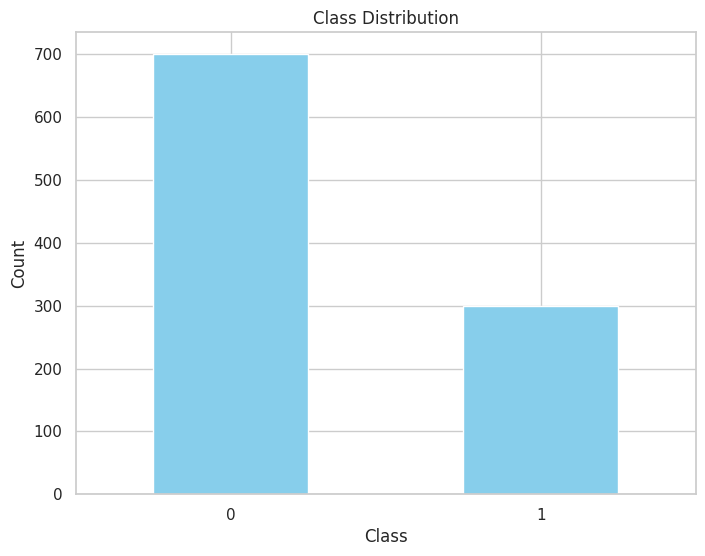

Class imbalance not detected.
700


0.7

In [ ]:
# Count the occurrences of each class
class_counts = df['default'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()




In [ ]:
df['checking_balance']

0          < 0 SGD
1      1 - 200 SGD
2          unknown
3          < 0 SGD
4          < 0 SGD
          ...     
995        unknown
996        < 0 SGD
997        unknown
998        < 0 SGD
999    1 - 200 SGD
Name: checking_balance, Length: 1000, dtype: object

In [ ]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,0
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,1
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,0
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,0
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,1


In [ ]:


columns_to_encode = ['checking_balance','credit_history','purpose','savings_balance','employment_duration','other_credit','housing','job','phone']



# Check if the specified columns exist in the DataFrame
missing_columns = [col for col in columns_to_encode if col not in df.columns]

if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # Use pd.get_dummies to one-hot encode the specified columns
    one_hot_encoded = pd.get_dummies(df, columns=columns_to_encode)

    # Display the resulting DataFrame
    print(one_hot_encoded)


     months_loan_duration  amount  percent_of_income  years_at_residence  age  \
0                       6    1169                  4                   4   67   
1                      48    5951                  2                   2   22   
2                      12    2096                  2                   3   49   
3                      42    7882                  2                   4   45   
4                      24    4870                  3                   4   53   
..                    ...     ...                ...                 ...  ...   
995                    12    1736                  3                   4   31   
996                    30    3857                  4                   4   40   
997                    12     804                  4                   4   38   
998                    45    1845                  4                   4   23   
999                    45    4576                  3                   4   27   

     existing_loans_count  

In [ ]:
one_hot_encoded.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 SGD,checking_balance_< 0 SGD,checking_balance_> 200 SGD,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 SGD,savings_balance_500 - 1000 SGD,savings_balance_< 100 SGD,savings_balance_> 1000 SGD,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,48,5951,2,2,22,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [ ]:

from collections import Counter
from sklearn.utils import resample

def balance_dataframe(df, target_column):
    """
    Balance a DataFrame by oversampling the minority class based on the specified target column.

    Parameters:
    - df: pandas DataFrame, input DataFrame containing features and the target column
    - target_column: str, the name of the target column

    Returns:
    - balanced_df: pandas DataFrame, balanced DataFrame with oversampled minority class
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Count the occurrences of each class in the target column
    class_counts = Counter(y)

    # Find the class with the maximum number of occurrences (majority class)
    majority_class = max(class_counts, key=class_counts.get)

    # Find the minority class
    minority_class = min(class_counts, key=class_counts.get)

    # Calculate the desired number of samples for the minority class
    desired_samples = class_counts[majority_class]

    # Oversample the minority class to match the majority class
    minority_df = df[df[target_column] == minority_class]
    minority_df_resampled = resample(minority_df, n_samples=desired_samples, random_state=42)

    # Combine the resampled minority class with the majority class
    balanced_df = pd.concat([minority_df_resampled, df[df[target_column] == majority_class]])

    return balanced_df


balance_dataframe(one_hot_encoded,'default')


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 SGD,checking_balance_< 0 SGD,checking_balance_> 200 SGD,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 SGD,savings_balance_500 - 1000 SGD,savings_balance_< 100 SGD,savings_balance_> 1000 SGD,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
368,36,3446,4,2,42,1,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
914,24,3161,4,2,31,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
381,18,12976,3,4,38,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1
257,12,2149,4,1,29,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
627,9,1437,2,3,29,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,12,2390,4,3,50,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
995,12,1736,3,4,31,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
996,30,3857,4,4,40,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


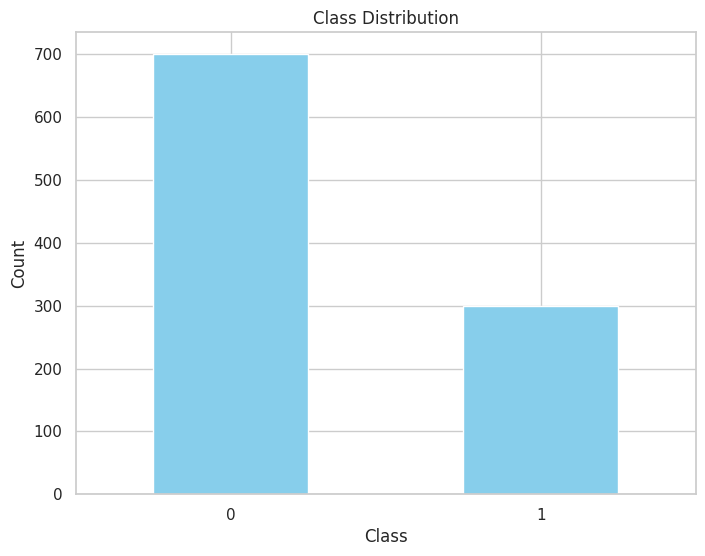

Class imbalance not detected.
700


0.7

In [ ]:
# Count the occurrences of each class
class_counts = one_hot_encoded['default'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Check for class imbalance
imbalance_threshold = 0.7  # Set your imbalance threshold here (e.g., 70%)
majority_class_count = class_counts.max()
total_samples = len(one_hot_encoded)

if (majority_class_count / total_samples) > imbalance_threshold:
    print("Class imbalance detected!")
else:
    print("Class imbalance not detected.")
print(majority_class_count)
majority_class_count / total_samples

In [ ]:
x = one_hot_encoded.drop(columns=['default'])
y =  one_hot_encoded['default']

# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 700, 1: 300})
Resample dataset shape Counter({0: 300, 1: 300})


class 0: (700, 45)
class 1: (300, 45)
total class of 1 and0: 0    300
1    300
Name: default, dtype: int64


<Axes: title={'center': 'count (target)'}>

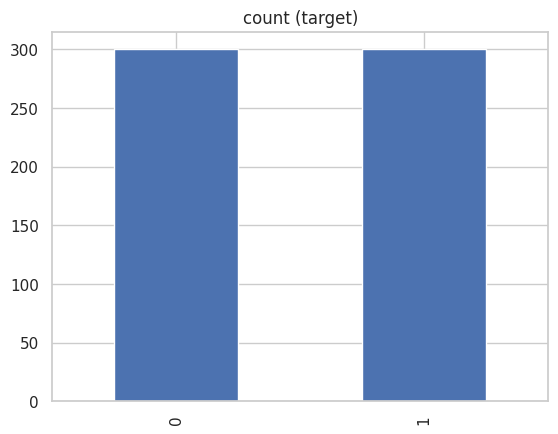

In [ ]:
# class count
class_count_0, class_count_1 =  one_hot_encoded['default'].value_counts()

# Separate class
class_0 =  one_hot_encoded[ one_hot_encoded['default'] == 0]
class_1 =  one_hot_encoded[ one_hot_encoded['default'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)




class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['default'].value_counts())# plot the count after under-sampeling
test_under['default'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
num_zeros = (test_under['default'] == 0).sum()
num_ones = (test_under['default'] == 1).sum()

# Print the results
print("Number of 0s:", num_zeros)
print("Number of 1s:", num_ones)

Number of 0s: 300
Number of 1s: 300


In [ ]:
test_under.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 SGD,checking_balance_< 0 SGD,checking_balance_> 200 SGD,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 SGD,savings_balance_500 - 1000 SGD,savings_balance_< 100 SGD,savings_balance_> 1000 SGD,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
825,21,1602,4,3,30,2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
905,12,1107,2,2,20,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
970,15,1514,4,2,22,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
799,9,1549,4,2,35,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
992,18,1936,2,4,23,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0


In [ ]:
test_df = pd.read_csv(r'/content/drive/MyDrive/Predict_Data_Singapore Credit Dataset.csv')

In [ ]:
test_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no
1,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes
2,1 - 200 SGD,30,critical,car,5234,< 100 SGD,unemployed,4,2,28,none,own,2,management,1,no
3,< 0 SGD,24,critical,car,1199,< 100 SGD,> 7 years,4,4,60,none,own,2,unskilled,1,no
4,< 0 SGD,30,perfect,business,8072,unknown,< 1 year,2,3,25,bank,own,3,skilled,1,no


In [ ]:
columns_to_encode = ['checking_balance','credit_history','purpose','savings_balance','employment_duration','other_credit','housing','job','phone']
# Check if the specified columns exist in the DataFrame
missing_columns = [col for col in columns_to_encode if col not in test_df.columns]

if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # Use pd.get_dummies to one-hot encode the specified columns
    one_hot_encoded_test= pd.get_dummies(test_df, columns=columns_to_encode)

    # Display the resulting DataFrame
    print(one_hot_encoded_test)

     months_loan_duration  amount  percent_of_income  years_at_residence  age  \
0                      48    5951                  2                   2   22   
1                      36    9055                  2                   4   35   
2                      30    5234                  4                   2   28   
3                      24    1199                  4                   4   60   
4                      30    8072                  2                   3   25   
..                    ...     ...                ...                 ...  ...   
245                    48    4844                  3                   2   33   
246                    15    1433                  4                   3   25   
247                    24    1743                  4                   2   48   
248                    36    3959                  4                   3   30   
249                    12     804                  4                   4   38   

     existing_loans_count  

In [ ]:
one_hot_encoded_test.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 SGD,checking_balance_< 0 SGD,checking_balance_> 200 SGD,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 SGD,savings_balance_500 - 1000 SGD,savings_balance_< 100 SGD,savings_balance_> 1000 SGD,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,48,5951,2,2,22,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,36,9055,2,4,35,1,2,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
2,30,5234,4,2,28,2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
3,24,1199,4,4,60,2,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
4,30,8072,2,3,25,3,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
X = test_under.drop(columns=['default'])
Y =  test_under['default']


from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_train_pred = logreg.predict(X_train_scaled)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(X_train_scaled, y_train)))

Accuracy of logistic regression classifier on train set: 0.767


In [ ]:
y_pred = logreg.predict(X_test_scaled)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test_scaled, y_test)))

Accuracy of logistic regression classifier on test set: 0.689


In [ ]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
y_pred_proba

array([0.86951607, 0.60317598, 0.47773312, 0.07223233, 0.26988654,
       0.11906587, 0.97179291, 0.86399735, 0.803464  , 0.27647253,
       0.50022733, 0.85797348, 0.89783437, 0.15573971, 0.20584436,
       0.60548437, 0.7143762 , 0.08360524, 0.09342181, 0.57878097,
       0.75965831, 0.16348361, 0.56540853, 0.4405013 , 0.74405889,
       0.62033417, 0.75412681, 0.78106415, 0.65218694, 0.92262519,
       0.43549777, 0.7510786 , 0.01669924, 0.76907795, 0.1279579 ,
       0.29267876, 0.11548345, 0.09657056, 0.4887584 , 0.11128491,
       0.85991118, 0.94537687, 0.39604865, 0.25551071, 0.92804831,
       0.47569934, 0.43290305, 0.93018698, 0.37309361, 0.10612523,
       0.21516318, 0.06480975, 0.01404623, 0.41749482, 0.38744034,
       0.7343867 , 0.83818869, 0.72497139, 0.05090641, 0.05392262,
       0.8476311 , 0.25098783, 0.08270606, 0.38704145, 0.21905881,
       0.93464202, 0.35719558, 0.06107271, 0.77483721, 0.46837217,
       0.88301744, 0.14073565, 0.69984538, 0.20823421, 0.75291

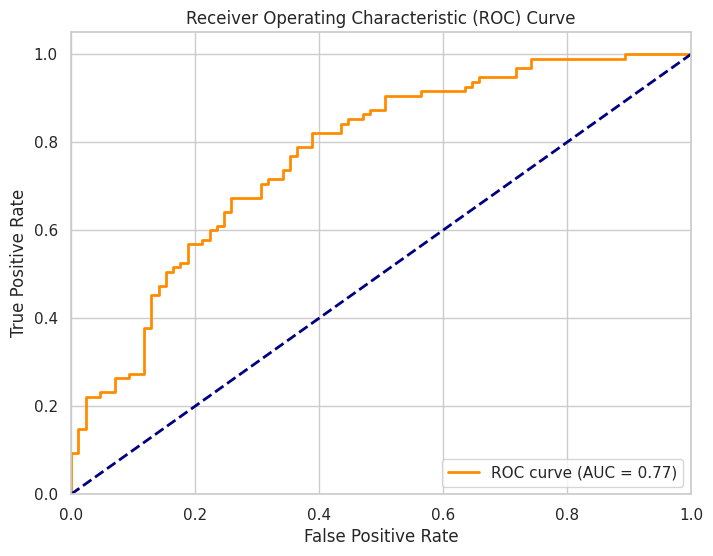

{'Precision': 0.7142857142857143,
 'Recall': 0.6842105263157895,
 'F1 Score': 0.6989247311827957,
 'AUC Score': 0.7696594427244582}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


In [ ]:
X = test_under.drop(columns=['default'])
Y =  test_under['default']


from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)

# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_train_pred = logreg.predict(X_train_scaled)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(X_train_scaled, y_train)))

Accuracy of logistic regression classifier on train set: 0.750


In [ ]:
y_pred = logreg.predict(X_test_scaled)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test_scaled, y_test)))

Accuracy of logistic regression classifier on test set: 0.708


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test_scaled, y_test)))

Accuracy of logistic regression classifier on test set: 0.708


In [ ]:
X = test_under.drop(columns=['default'])
Y =  test_under['default']


from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled_final = scaler.transform(one_hot_encoded_test)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_train_pred = logreg.predict(X_train_scaled)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(X_train_scaled, y_train)))

Accuracy of logistic regression classifier on train set: 0.751


In [ ]:
y_pred = logreg.predict(X_test_scaled)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test_scaled, y_test)))

#2nd Method - Confusion Matrix

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy of logistic regression classifier on test set: 0.733


Predicted,0,1,All
Actual,,,
0,51,21,72
1,19,59,78
All,70,80,150


Balanced Accuracy Score:  0.732


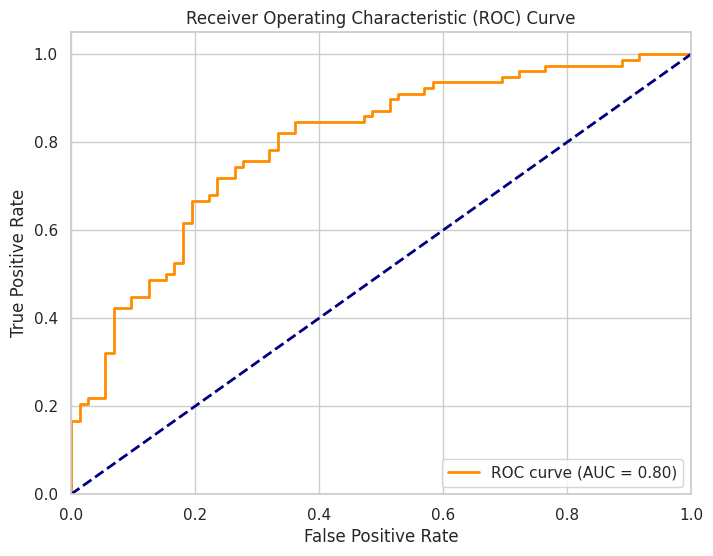

{'Precision': 0.7375,
 'Recall': 0.7564102564102564,
 'F1 Score': 0.7468354430379747,
 'AUC Score': 0.7959401709401709}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }


from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred)))
calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)



In [ ]:
predictions = logreg.predict(X_test_scaled_final)

print(predictions)

test_df['default'] = predictions

test_df.to_csv('test_data_with_predictions(new).csv', index=False)

[1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0
 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0]


In [ ]:
predictions

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0])

## MODEL 2[DECISION_TREE_CLASSIFIER]

In [ ]:
from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = dtree.predict(X_train_scaled)
print('Accuracy of decision tree classifier on train set: {:.3f}'.format(dtree.score(X_train_scaled, y_train)))

Accuracy of decision tree classifier on train set: 1.000


In [ ]:
y_pred = dtree.predict(X_test_scaled)

In [ ]:
print('Accuracy of decision tree classifier on test set: {:.3f}'.format(dtree.score(X_test_scaled, y_test)))

Accuracy of decision tree classifier on test set: 0.639


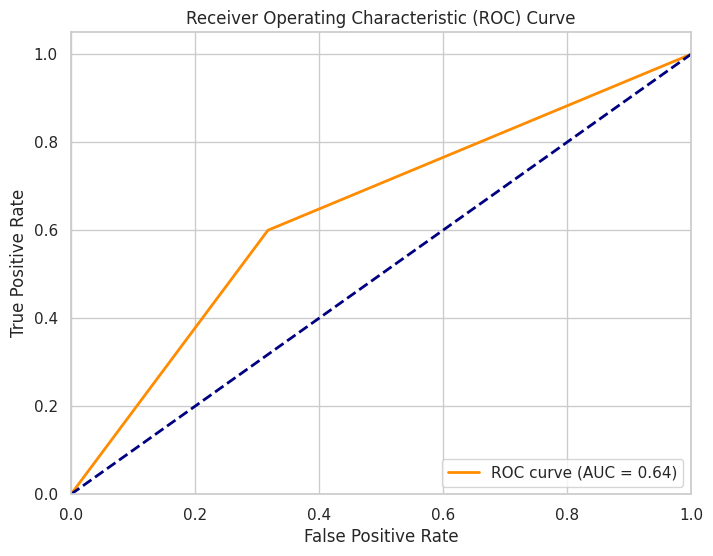

{'Precision': 0.6785714285714286,
 'Recall': 0.6,
 'F1 Score': 0.6368715083798883,
 'AUC Score': 0.6411764705882353}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = dtree.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


In [ ]:
from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = dtree.predict(X_train_scaled)
print('Accuracy of decision tree classifier on train set: {:.3f}'.format(dtree.score(X_train_scaled, y_train)))

Accuracy of decision tree classifier on train set: 1.000


In [ ]:
y_pred = dtree.predict(X_test_scaled)

In [ ]:
print('Accuracy of decision tree classifier on test set: {:.3f}'.format(dtree.score(X_test_scaled, y_test)))

Accuracy of decision tree classifier on test set: 0.683


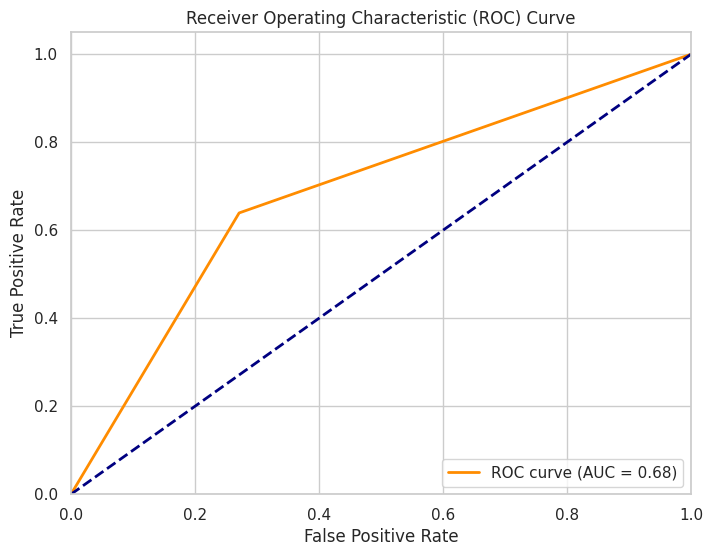

{'Precision': 0.7090909090909091,
 'Recall': 0.639344262295082,
 'F1 Score': 0.6724137931034484,
 'AUC Score': 0.684078910808558}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = dtree.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


In [ ]:
from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = dtree.predict(X_train_scaled)
print('Accuracy of decision tree classifier on train set: {:.3f}'.format(dtree.score(X_train_scaled, y_train)))

Accuracy of decision tree classifier on train set: 1.000


In [ ]:
y_pred = dtree.predict(X_test_scaled)

print('Accuracy of decision tree classifier on test set: {:.3f}'.format(dtree.score(X_test_scaled, y_test)))

Accuracy of decision tree classifier on test set: 0.673


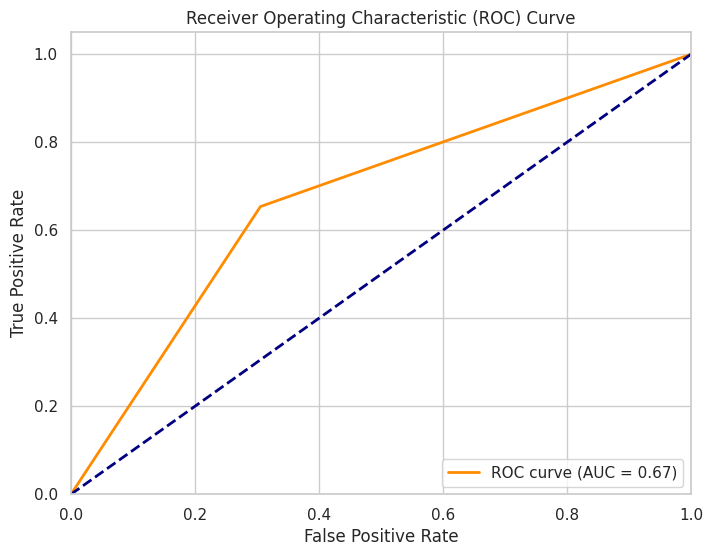

{'Precision': 0.6986301369863014,
 'Recall': 0.6538461538461539,
 'F1 Score': 0.6754966887417219,
 'AUC Score': 0.6741452991452991}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = dtree.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


## MODEL 3[RANDOM_FOREST]

In [ ]:
from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = rfc.predict(X_train_scaled)
print('Accuracy of random forest classifier on train set: {:.3f}'.format(rfc.score(X_train_scaled, y_train)))

Accuracy of random forest classifier on train set: 1.000


In [ ]:
y_pred = rfc.predict(X_test_scaled)

print('Accuracy of random forest classifier on test set: {:.3f}'.format(rfc.score(X_test_scaled, y_test)))

Accuracy of random forest classifier on test set: 0.733


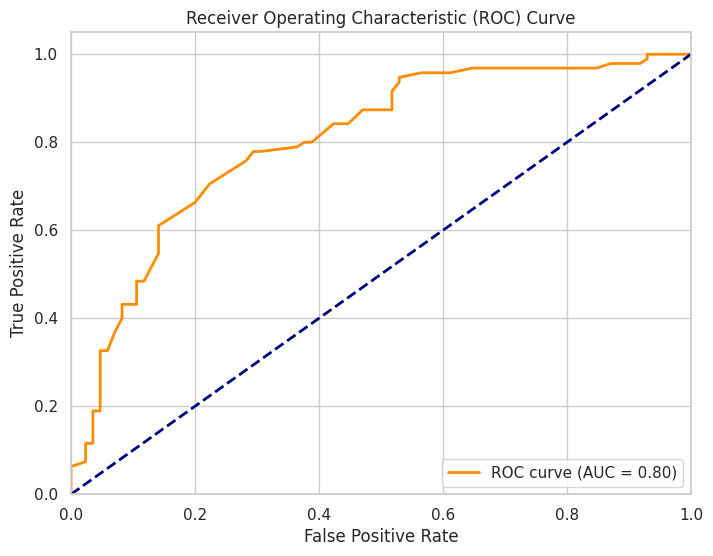

{'Precision': 0.7790697674418605,
 'Recall': 0.7052631578947368,
 'F1 Score': 0.7403314917127073,
 'AUC Score': 0.8038390092879256}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = rfc.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


In [ ]:
from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = rfc.predict(X_train_scaled)
print('Accuracy of random forest classifier on train set: {:.3f}'.format(rfc.score(X_train_scaled, y_train)))

Accuracy of random forest classifier on train set: 1.000


In [ ]:
y_pred = rfc.predict(X_test_scaled)

print('Accuracy of random forest classifier on test set: {:.3f}'.format(rfc.score(X_test_scaled, y_test)))

Accuracy of random forest classifier on test set: 0.725


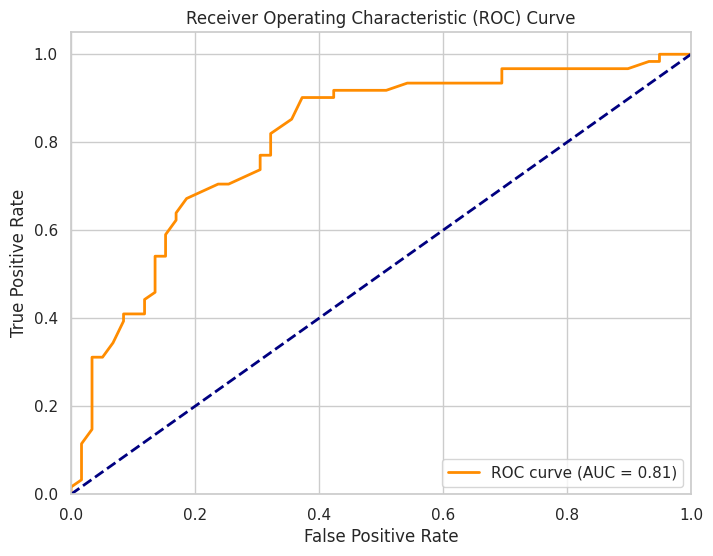

{'Precision': 0.7142857142857143,
 'Recall': 0.7377049180327869,
 'F1 Score': 0.7258064516129032,
 'AUC Score': 0.8066129480411226}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = rfc.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


In [ ]:
from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = rfc.predict(X_train_scaled)
print('Accuracy of random forest classifier on train set: {:.3f}'.format(rfc.score(X_train_scaled, y_train)))

from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_train_pred)))


Accuracy of random forest classifier on train set: 1.000
Balanced Accuracy Score:  1.000


In [ ]:
y_pred = rfc.predict(X_test_scaled)

print('Accuracy of random forest classifier on test set: {:.3f}'.format(rfc.score(X_test_scaled, y_test)))

from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred)))


#2nd Method - Confusion Matrix

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy of random forest classifier on test set: 0.773
Balanced Accuracy Score:  0.773


Predicted,0,1,All
Actual,,,
0,55,17,72
1,17,61,78
All,72,78,150


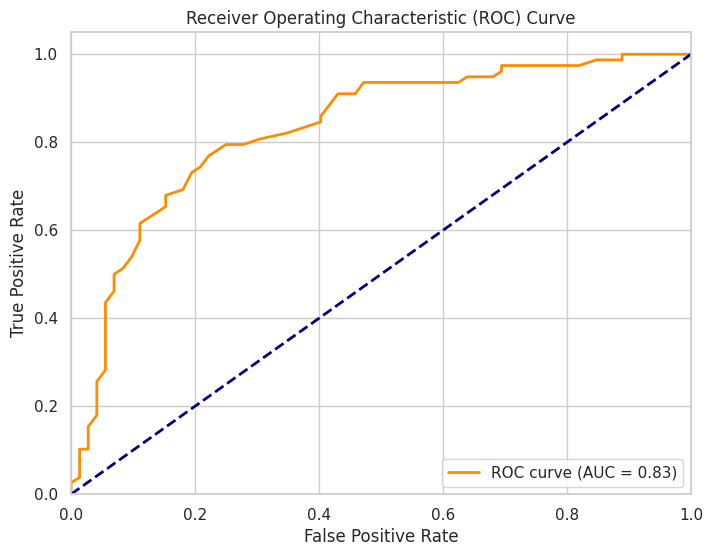

{'Precision': 0.775,
 'Recall': 0.7948717948717948,
 'F1 Score': 0.7848101265822786,
 'AUC Score': 0.8314636752136751}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = rfc.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


## MODEL 4[XG_BOOST]

In [ ]:
from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=len(test_under.default),  # Number of classes
    max_depth=5,  # Maximum depth of each tree
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Learning rate
    random_state=42
)

xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=600,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_train_pred = xgb_classifier.predict(X_train_scaled)
print('Accuracy of xgb_classifier on train set: {:.3f}'.format(xgb_classifier.score(X_train_scaled, y_train)))

Accuracy of xgb_classifier on train set: 0.998


In [ ]:
y_pred = xgb_classifier.predict(X_test_scaled)

print('Accuracy of xgb_classifier on test set: {:.3f}'.format(xgb_classifier.score(X_test_scaled, y_test)))

Accuracy of xgb_classifier on test set: 0.717


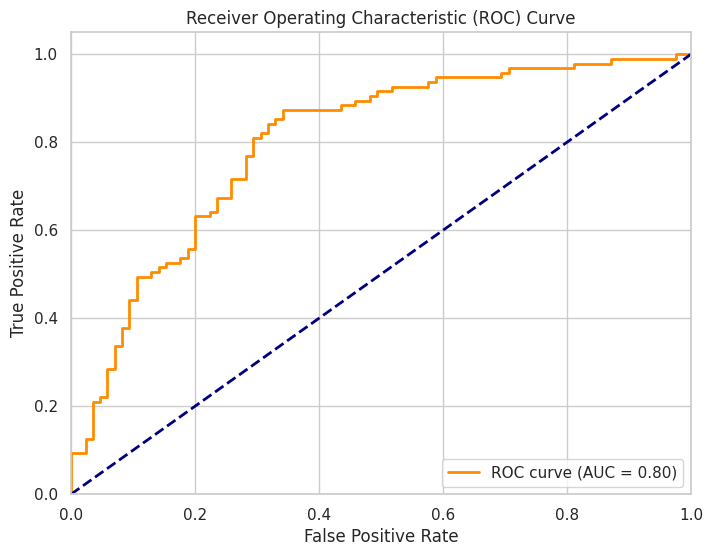

{'Precision': 0.7619047619047619,
 'Recall': 0.6736842105263158,
 'F1 Score': 0.7150837988826816,
 'AUC Score': 0.7997523219814241}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = xgb_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


In [ ]:
from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=len(test_under.default),  # Number of classes
    max_depth=5,  # Maximum depth of each tree
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Learning rate
    random_state=42
)

xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=600,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_train_pred = xgb_classifier.predict(X_train_scaled)
print('Accuracy of xgb_classifier on train set: {:.3f}'.format(xgb_classifier.score(X_train_scaled, y_train)))

Accuracy of xgb_classifier on train set: 0.988


In [ ]:
y_pred = xgb_classifier.predict(X_test_scaled)

print('Accuracy of xgb_classifier on test set: {:.3f}'.format(xgb_classifier.score(X_test_scaled, y_test)))

Accuracy of xgb_classifier on test set: 0.708


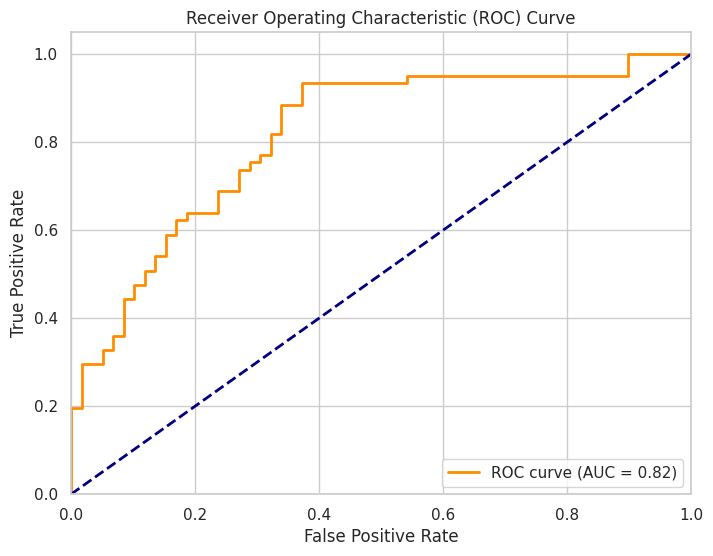

{'Precision': 0.7358490566037735,
 'Recall': 0.639344262295082,
 'F1 Score': 0.6842105263157895,
 'AUC Score': 0.8155043067518755}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = xgb_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


In [ ]:
from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=len(test_under.default),  # Number of classes
    max_depth=5,  # Maximum depth of each tree
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Learning rate
    random_state=42
)

xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=600,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_train_pred = xgb_classifier.predict(X_train_scaled)
print('Accuracy of xgb_classifier on train set: {:.3f}'.format(xgb_classifier.score(X_train_scaled, y_train)))

Accuracy of xgb_classifier on train set: 0.998


In [ ]:
y_pred = xgb_classifier.predict(X_test_scaled)

print('Accuracy of xgb_classifier on test set: {:.3f}'.format(xgb_classifier.score(X_test_scaled, y_test)))

Accuracy of xgb_classifier on test set: 0.760


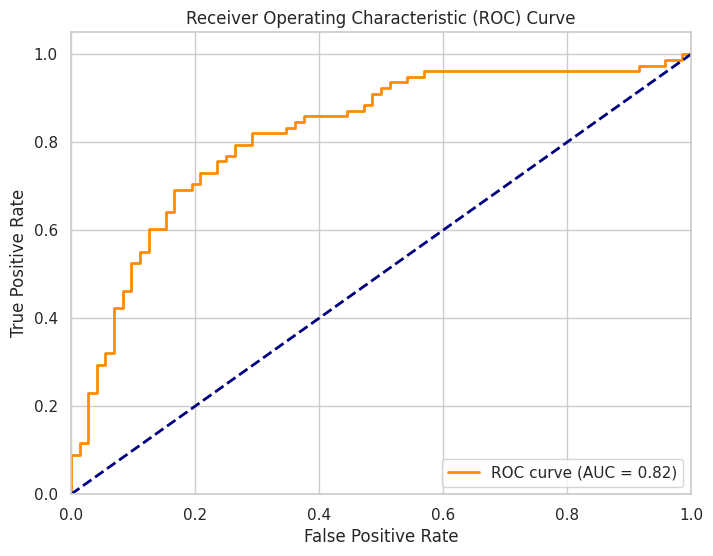

{'Precision': 0.7857142857142857,
 'Recall': 0.7051282051282052,
 'F1 Score': 0.7432432432432433,
 'AUC Score': 0.8187321937321936}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = xgb_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


## MODEL 5

In [ ]:
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

bnb_classifier = BernoulliNB(alpha=1)


bnb_classifier.fit(X_train_scaled, y_train)


BernoulliNB(alpha=1)

In [ ]:
y_train_pred = bnb_classifier.predict(X_train_scaled)
print('Accuracy of bnb_classifier on train set: {:.3f}'.format(bnb_classifier.score(X_train_scaled, y_train)))

Accuracy of bnb_classifier on train set: 0.742


In [ ]:

y_pred = bnb_classifier.predict(X_test_scaled)

print('Accuracy of bnb_classifier on test set: {:.3f}'.format(bnb_classifier.score(X_test_scaled, y_test)))

Accuracy of bnb_classifier on test set: 0.713


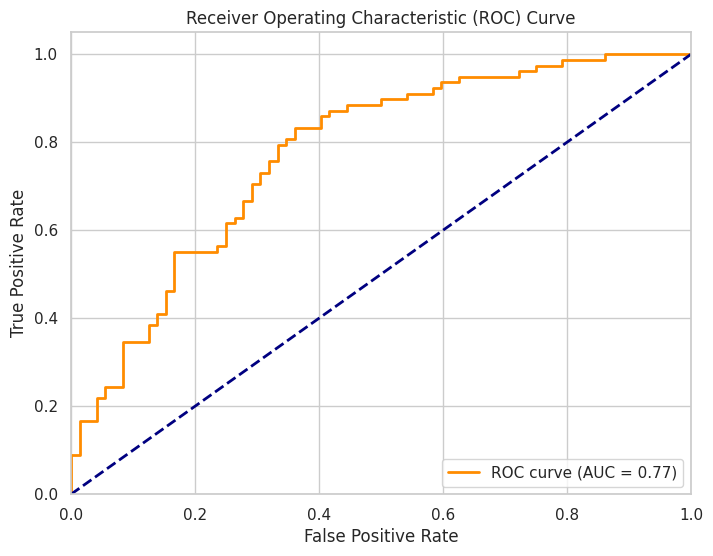

{'Precision': 0.7160493827160493,
 'Recall': 0.7435897435897436,
 'F1 Score': 0.7295597484276728,
 'AUC Score': 0.7740384615384615}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = bnb_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


In [ ]:
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

bnb_classifier = BernoulliNB(alpha=1)


bnb_classifier.fit(X_train_scaled, y_train)

BernoulliNB(alpha=1)

In [ ]:
y_train_pred = bnb_classifier.predict(X_train_scaled)
print('Accuracy of bnb_classifier on train set: {:.3f}'.format(bnb_classifier.score(X_train_scaled, y_train)))

Accuracy of bnb_classifier on train set: 0.743


In [ ]:
y_pred = bnb_classifier.predict(X_test_scaled)

print('Accuracy of bnb_classifier on test set: {:.3f}'.format(bnb_classifier.score(X_test_scaled, y_test)))

Accuracy of bnb_classifier on test set: 0.683


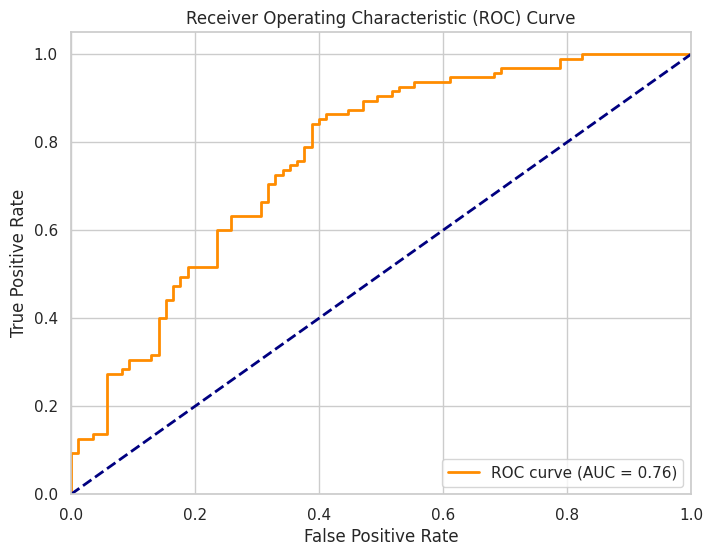

{'Precision': 0.7065217391304348,
 'Recall': 0.6842105263157895,
 'F1 Score': 0.6951871657754011,
 'AUC Score': 0.7629721362229102}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = bnb_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)


In [ ]:
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
X = test_under.drop(columns=['default'])
Y =  test_under['default']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

bnb_classifier = BernoulliNB(alpha=1)


bnb_classifier.fit(X_train_scaled, y_train)

BernoulliNB(alpha=1)

In [ ]:
y_train_pred = bnb_classifier.predict(X_train_scaled)
print('Accuracy of bnb_classifier on train set: {:.3f}'.format(bnb_classifier.score(X_train_scaled, y_train)))

Accuracy of bnb_classifier on train set: 0.738


In [ ]:
y_pred = bnb_classifier.predict(X_test_scaled)

print('Accuracy of bnb_classifier on test set: {:.3f}'.format(bnb_classifier.score(X_test_scaled, y_test)))

Accuracy of bnb_classifier on test set: 0.708


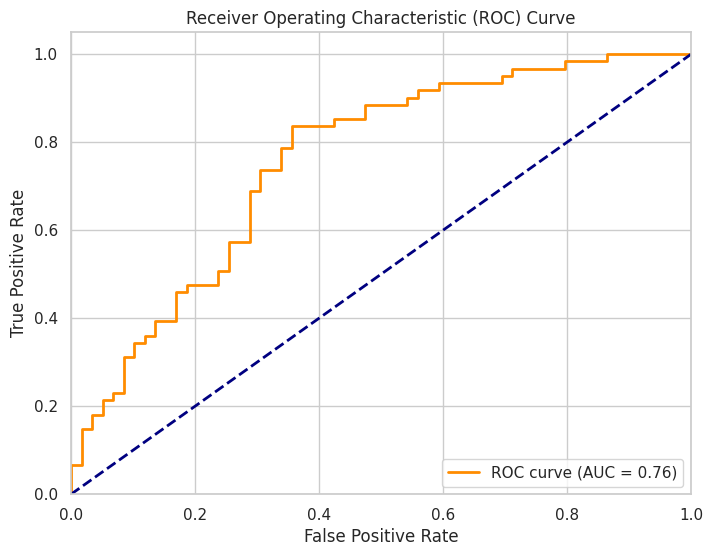

{'Precision': 0.7096774193548387,
 'Recall': 0.7213114754098361,
 'F1 Score': 0.7154471544715446,
 'AUC Score': 0.756599055293137}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True):
    # Assuming you already have a trained model that can predict probabilities for X_test_scaled
    y_pred_prob = bnb_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

    # Calculate precision, recall, and F1 score
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    if plot_auc_curve:
        # Generate ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': auc_score
    }

calculate_metrics_with_test_data(X_test_scaled, y_test, plot_auc_curve=True)
